In [1]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
# import the necessary packages

from zipfile import ZipFile
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import os
import sys



In [38]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2


--2022-05-24 00:15:48--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  56.0MB/s    in 1.1s    

2022-05-24 00:15:49 (56.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [40]:
!bzip2 -d  '/content/facial-landmarks/shape_predictor_68_face_landmarks.dat.bz2'


bzip2: Output file /content/facial-landmarks/shape_predictor_68_face_landmarks.dat already exists.


In [19]:
# with ZipFile('/content/AFLW2000_HPose.zip','r') as zipobj:
#   zipobj.extractall()


In [25]:
# !wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
# !unzip -qq facial-landmarks.zip
# %cd facial-landmarks

--2022-05-23 23:38:50--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.176.121
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.176.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74572347 (71M) [binary/octet-stream]
Saving to: ‘facial-landmarks.zip’

facial-landmarks.zi 100%[===================>]  71.12M  26.4MB/s    in 2.7s    

2022-05-23 23:38:53 (26.4 MB/s) - ‘facial-landmarks.zip’ saved [74572347/74572347]

/content/facial-landmarks


In [73]:
# predictor=dlib.shape_predictor('/content/facial-landmarks/shape_predictor_68_face_landmarks.dat')



In [79]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [74]:
args = {
	"shape_predictor": "shape_predictor_68_face_landmarks.dat",
	"image": "images/example_01.jpg"
}

In [76]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)


172 162
171 177
170 192
170 207
172 222
178 237
186 250
197 261
211 266
226 265
240 257
251 247
260 235
267 223
272 209
276 195
279 181
182 160
190 155
200 155
210 158
219 163
236 167
246 165
256 166
266 169
271 177
225 174
224 186
223 198
221 210
207 210
213 214
219 218
226 216
232 214
192 169
199 167
205 168
211 174
204 174
197 172
239 179
246 176
253 177
259 181
252 182
245 181
190 217
200 220
210 222
217 224
225 224
234 225
243 225
233 234
223 238
215 237
207 235
198 229
194 220
209 226
217 228
224 228
239 226
224 230
216 230
209 228


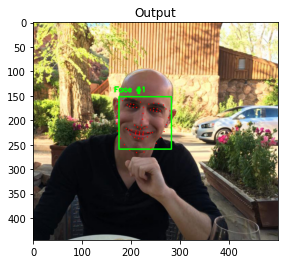

In [80]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		print(x,y)
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
plt_imshow("Output", image)